#### Чернышова Дана, группа 6209
##### Вариант 21
##### Лабораторная работа №5

In [2]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
import math

Задание 1. Решить нелинейное уравнение на указанном отрезке используя методы половинного деления, метод хорд и метод Ньютона с $\varepsilon = 0.0001$
$2.3x^3 + 5.75x^2 - 7.41x - 10.6$

$a = -4; b = 3$

In [ ]:
def separate(f, x, a, b, h):
    nm_roots = len(sm.solve(f,x))
    i = 0
    intervals = []
    b_temp = a + h
    while i < nm_roots:
        b_temp+=h
        # if function has changed its sign -> solution is found
        if f.subs(x, b_temp) * f.subs(x, a) < 0:
            intervals.append((a, b_temp + 0.5))
            a = b_temp/2
            i+=1
    return intervals

def half_division_method(intervals, eps, x, f):
    i = 0
    hdm_list = []
    while i < len(intervals):
        a = intervals[i][0]
        b = intervals[i][1]
        k = 0
        if f.subs(x, a) * f.subs(x, b) < 0:
            # print('\nРезультаты итераций половинного деления')
            # print('n,     a,     b,     c,     b-c ')
            while True:
                # devide the line segment
                c = (a + b)/2
                if f.subs(x, c) * f.subs(x, b) < 0:
                    a = c
                else:
                    b = c
                # print('%d, %.4f, %.4f, %.4f, %.4f'%(k, a, b, c, b-c))
                k += 1
                if abs(f.subs(x, b) - f.subs(x, a)) < eps:
                    break
            c = (a+b)/2
            print(f'Solution {c}\n')
            hdm_list.append(c)
        i+=1
    return hdm_list

def chord_method(intervals, f, x, eps):
    i = 0
    cm_list = [] # list to store solutions
    while i < len(intervals):
        # initialize the  beginning and the end of an line segment
        a = intervals[i][0]
        b = intervals[i][1]
        k = 0 
        print('\nChord method results')
        print('n,     a,     b,     Xn ')
        # check if signs are different
        if f.subs(x, a) * f.subs(x, b) < 0:
            while True:
                Xn = a - f.subs(x, a) * (b - a)/(f.subs(x, b) - f.subs(x, a))
                print('%d, %.4f, %.4f, %.4f'%(k, a, b, Xn))
                k += 1
                if abs(Xn - b) < eps:
                    break
                a, b = b, Xn
            print(f'Solution: {Xn}\n')
            cm_list.append(Xn)
        i+=1
    return cm_list

def Newton_method(intervals, f, x, eps):
    i = 0
    nm_list = [] # list to store solutions
    while i < len(intervals):
        # initialize the  beginning and the end of an line segment
        a = intervals[i][0] 
        b = intervals[i][1]
        k = 0 
        # initialize x0: if F(a) * F(a)'' < 0, then x0 = b, else x0 = a
        x0 = b if f.subs(x, a) * f.diff(x).diff(x).subs(x, a) < 0 else a
        if all([not f.diff(x) == 0, not f.diff(x).diff(x) == 0, f.subs(x, a) * f.subs(x, b) < 0]): 
            # print('\nNewton method results')
            # print('n,     Xn-1,     Xn,     del,     eps ')
            while True:
                Xn = x0 - f.subs(x, x0)/f.diff(x).subs(x, x0)
                # print('%d, %.4f, %.4f, %.4f, %.4f'%(k, x0, Xn, abs(x0 - Xn), eps))
                k += 1
                if abs(x0 - Xn) < eps:
                    nm_list.append(Xn)
                    # print(f'Solution: {Xn}\n')
                    break
                x0 = Xn
        i += 1
    return nm_list

a = -4
b = 3
eps = 0.0001
h = 0.001
x = sm.Symbol('x')
f = 2.3 * x**3 + 5.75 * x**2 - 7.41 * x - 10.6
sm.plot(f, xlabel = 'x', ylabel = 'y' ,xlim = (a, b), ylim = (-20,20))
intervals = separate(f, x, a, b, h)

hdm_list = half_division_method(intervals, eps, x, f)
cm_list = chord_method(intervals, f, x, eps)
nm_list = Newton_method(intervals, f, x, eps)
print('sm.solve:\n', sm.solve(f,x))
print('half devision:\n', hdm_list)
print('chord method:\n', cm_list)
print('Newton method:\n', nm_list)



Задние  2. Решить систему нелинейных уравнений методом Ньютона с $\varepsilon = 0.0001$
$\left\{\begin{matrix}
 &cos(x + 0.5) - y = 2\\ 
 &sin(y) - 2x = 1
\end{matrix}\right.$

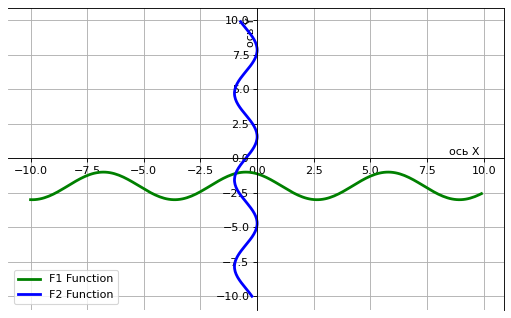

function 1:
 -y + cos(x + 0.5) - 2 
function 2:
 -2*x + sin(y) - 1

Якобиан:
 [[-sin(x + 0.5) -1]
 [-2 cos(y)]]

Система линейных уравнений относительно приращений:
[-w - z*sin(x + 0.5)] = y - cos(x + 0.5) + 2
[w*cos(y) - 2*z] = 2*x - sin(y) + 1

Результаты итераций метода Ньютона

Решение системы относительно приращений с x = -0.7 и y = -0.8 :
 -0.2527872719103728 -0.2701545003027013 

n,     Xn,     Xn+1,     Yn,     Yn+1,   delX,   delY,   norm 
1, -0.7000, -0.9528, -0.8000, -1.0702, -0.2528, -0.2702, 0.2528

Решение системы относительно приращений с x = -0.9527872719103727 и y = -1.0701545003027013 :
 0.007600691519852548 -0.02728915859637182 

n,     Xn,     Xn+1,     Yn,     Yn+1,   delX,   delY,   norm 
2, -0.9528, -0.9452, -1.0702, -1.0974, 0.0076, -0.0273, 0.0076

Решение системы относительно приращений с x = -0.9451865803905202 и y = -1.0974436588990732 :
 0.0001754194779452753 4.953382293519872e-05 

n,     Xn,     Xn+1,     Yn,     Yn+1,   delX,   delY,   norm 
3, -0.9452, 

In [6]:
#функция для вычисления Якобиана
def Yakobi(F1, F2, x ,y):
    #создаем список для производных по 'x'
    X = []
    #считаем производную первой функции
    X.append(F1.diff(x))
    #считаем производную второй функции
    X.append(F2.diff(x))
    Y = []
    #считаем производную первой функции
    Y.append(F1.diff(y))
    #считаем производную второй функции
    Y.append(F2.diff(y))
    #возвраащем матрицу 
    return np.transpose((np.array(X), np.array(Y)))

#функция для построения графиков
def graphics():
    #границы по 'x'
    x_vals = np.arange(-10, 10, 0.1) 
    #объявляем наши функции. Первая
    Func_1 = [mth.cos(x + 0.5) - 2 for x in x_vals]
    #вторая
    Func_2 = [(np.sin(x)-1)/2 for x in x_vals]
    
    # Создание объектов артборда и холста
    plt.figure(figsize=(8, 5), dpi=80)
    ax = plt.subplot(111)

    #устанавление корректного изображения осей
    ax.xaxis.set_ticks_position('bottom')#для оси x
    ax.spines['bottom'].set_position(('data', 0)) #смещение оси
    ax.yaxis.set_ticks_position('left') #для оси y
    ax.spines['left'].set_position(('data', 0)) #смещение оси

    #подпись осей и смещение подписи
    ax.set_xlabel('ось X')
    ax.xaxis.set_label_coords(0.92, 0.54)
    ax.set_ylabel('ось Y')
    ax.yaxis.set_label_coords(0.5, 0.92)
    #добавляем функции на график
    plt.plot(x_vals, Func_1, color='green', linewidth=2.5, linestyle='-', label='F1 Function')
    plt.plot(Func_2, x_vals, color='blue', linewidth=2.5, linestyle='-', label='F2 Function')
    #изменение легенды на графике
    plt.legend(loc='lower left', frameon=True)
    #добавление сетки
    plt.grid() 
    #выводим графики
    plt.show()

def fix_trig(fix):
    if 'cos' in str(fix):
        #вычлиняем значение в скобках
        sub_int = str(fix)[str(fix).find('(') + 1:str(fix).find(')')]
        #возвращаем подсчитанное значение
        return float(eval(str(fix).replace('cos(' + sub_int + ')',str(math.cos(float(sub_int))))))
    elif 'sin' in str(fix):
        #вычлиняем значение в скобках
        sub_int = str(fix)[str(fix).find('(') + 1:str(fix).find(')')]
        #возвращаем подсчитанное значение
        return float(eval(str(fix).replace('sin(' + sub_int + ')',str(math.sin(float(sub_int))))))  
    else:
        return fix

def Cramer(matr, vec):
    #заводим список с определителями
    determinants = []
    #добавляем туда определитель исходной матрицы
    determinants.append(np.linalg.det(matr))
    #в цикле по размерности матрицы будем считать определитель измененной матрицы
    for i in range(len(matr)):
        #делаем копию матрицы
        matr_copy = matr.copy()
        #заменяем нужный столбец на столбец значений
        matr_copy[:,i] = vec
        #добавляем в список новый определитель
        determinants.append(np.linalg.det(matr_copy))
    #возвращаем решение системы
    return [determinants[i]/determinants[0] for i in range(1,len(determinants))]

def solve_martix(Yakobi_Matrix, x, y, F1, F2, eps):
    #по графику берем приближенное значение
    x0, y0 = -0.7, -0.8
    #заводим новые переменные для системы линеный уравнений относительно приращений
    z = sm.Symbol('z')
    w = sm.Symbol('w')
    #заводим столбец с этими пеерменными
    delta = np.array([[z],[w]])
    #заводим систему линейных уравнений относительно приращений
    Matrix = np.dot(Yakobi_Matrix, delta)
    print('\nСистема линейных уравнений относительно приращений:')
    print(Matrix[0], '=', F1)
    print(Matrix[1], '=', F2)
    
    print('\nРезультаты итераций метода Ньютона')
    
    k = 0
    #в do while цикле получаем решение
    while True:
        k+=1
        #получаем матрицу коэффициентов левой части
        vector = np.array([Yakobi_Matrix[0][0].subs(x,x0).subs(y,y0), Yakobi_Matrix[0][1].subs(x,x0).subs(y,y0),
                          Yakobi_Matrix[1][0].subs(x,x0).subs(y,y0), fix_trig(Yakobi_Matrix[1][1].subs(x,x0).subs(y,y0))], float).reshape(2,-1)
        #получаем вектор значений - правую часть
        variables = np.array([F1.subs(x, x0).subs(y, y0), fix_trig(F2.subs(x, x0).subs(y, y0))], float)
        
        #считаем приращения
        del_x, del_y = Cramer(vector, variables)

        #считаем новые x, y
        x1, y1 = x0 + del_x, y0 + del_y
        
        print('\nРешение системы относительно приращений с x =', x0, 'и y =', y0, ':\n',del_x, del_y, '\n')
        
        norm = np.linalg.norm(x1 - x0)
        
        print('n,     Xn,     Xn+1,     Yn,     Yn+1,   delX,   delY,   norm ')
        print('%d, %.4f, %.4f, %.4f, %.4f, %.4f, %.4f, %.4f'%(k, x0, x1, y0, y1, del_x, del_y, norm)) 
        #если норма меньше эпсилон, то возвращаем найденное значение
        if norm < eps:
            #print('\nРешение системы: ', x1, y1)
            return x1, y1
            #break
        #обновляем значения предыдущих переменных
        x0, y0 = x1, y1
    
eps = 0.0001
y = sm.Symbol('y')
x = sm.Symbol('x')

F1 = sm.cos(x + 5/10) - y - 2
F2 = sm.sin(y) - 2 * x - 1
graphics()
yakobi_matrix = Yakobi(F1, F2, x, y)

print('func 1:', F1, '\nfunc 2:', F2)
print('\nЯкобиан:\n', yakobi_matrix)
#Получаем решение системы
solutions = solve_martix(yakobi_matrix, x, y, -1 * F1, -1 * F2, eps)
print('\nsolution: ', solutions[0], solutions[1])
print('sm.nsolve:', sm.nsolve((F1,F2),(x,y),(-50,50)))
print('\ncheck:')
print('func 1:', F1.subs(x, solutions[0]).subs(y, solutions[1]))
print('func 2:', F2.subs(x, solutions[0]).subs(y, solutions[1]))

